In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd
import fastai
print(fastai.__version__)

ModuleNotFoundError: No module named 'fastai'

In [2]:
DATA_DIR = '../input/brain_tumor_dataset'

In [3]:
class_names = []
for folder_name in os.listdir(DATA_DIR):
    class_names.append(folder_name)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/brain_tumor_dataset'

In [6]:
class_names

['no', 'yes']

In [7]:
image_paths = []
labels = []

for i in range(len(class_names)):
    class_name = class_names[i]
    image_names = os.listdir(f'{DATA_DIR}/{class_name}')
    for image_name in image_names:
        image_path = f'{DATA_DIR}/{class_name}/{image_name}'
        image_paths.append(image_path)
        labels.append(i)

In [8]:
df = pd.DataFrame(
{
    'name': image_paths,
    'label': labels
})

In [9]:
df.tail()

,name,label
248,../input/brain_tumor_dataset/yes/Y95.jpg,1
249,../input/brain_tumor_dataset/yes/Y96.jpg,1
250,../input/brain_tumor_dataset/yes/Y97.JPG,1
251,../input/brain_tumor_dataset/yes/Y98.JPG,1
252,../input/brain_tumor_dataset/yes/Y99.JPG,1


In [10]:
df.to_csv(
    path_or_buf = f'{DATA_DIR}/labels.csv',
    index = False
)

In [26]:
dls = ImageDataLoaders.from_folder(
path = DATA_DIR,
item_tfms = Resize(224),
bs = 16,
batch_tfms = [Normalize.from_stats(*imagenet_stats),RandTransform()],
valid_pct = 0.2)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


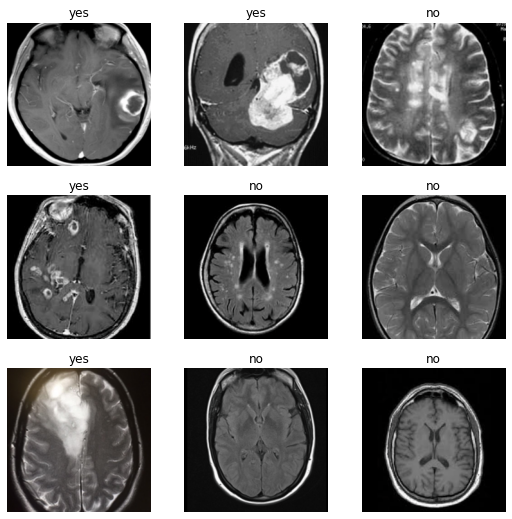

In [13]:
dls.show_batch()

In [14]:
model = vision_learner(
dls = dls,
arch = models.resnet50,
metrics = [accuracy,error_rate])

In [27]:
model.fine_tune(
epochs = 10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.379961,0.783987,0.780000,0.220000,00:53


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.251902,0.770052,0.880000,0.120000,01:11
1,0.216528,0.619283,0.920000,0.080000,01:07
2,0.240446,0.808018,0.880000,0.120000,01:06
3,0.209680,0.601760,0.860000,0.140000,01:07
4,0.364150,0.296328,0.900000,0.100000,01:07
5,0.328959,0.184254,0.920000,0.080000,01:07
6,0.265863,0.200024,0.960000,0.040000,01:06
7,0.219943,0.243352,0.920000,0.080000,01:08
8,0.173636,0.302118,0.900000,0.100000,01:07
9,0.139634,0.299890,0.900000,0.100000,01:06


SuggestedLRs(valley=7.585775892948732e-05)

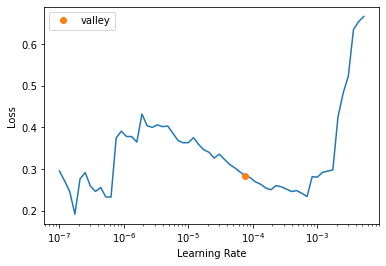

In [16]:
model.lr_find()

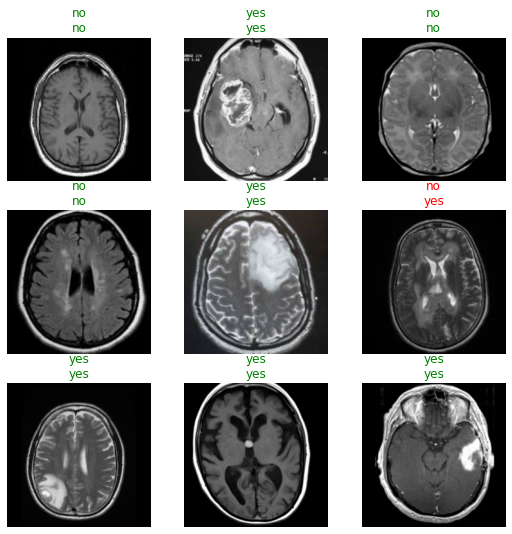

In [28]:
model.show_results()

In [18]:
model.export('tumor_detector.pkl')

In [19]:
new_model= load_learner(f'{DATA_DIR}/tumor_detector.pkl')

In [24]:
new_model.predict(
    item = r"C:\Users\Bharath Koli\Desktop\Brain_enhancement\input\yes\Y17.jpg"
)

('yes', TensorBase(1), TensorBase([0.0012, 0.9988]))